# Analyzing MD simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import chilife as xl 

C:\Program Files\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
traj = xl.load_protein('AR1A.pdb', 'AR1A.xtc')
SL = xl.SpinLabel.from_trajectory(traj, 2, spin_atoms = ['NN', 'ON'], use_H=True)
print(SL)

Rotamer ensemble with 237 members
  Name: 2CYR_from_traj
  Label: CYR
  Site: 2
  Dihedral definitions:
    ['N', 'CA', 'CB', 'SG']
    ['CA', 'CB', 'SG', 'S1L']
    ['CB', 'SG', 'S1L', 'C1L']
    ['SG', 'S1L', 'C1L', 'C1R']
    ['S1L', 'C1L', 'C1R', 'C2R']
  spin atoms:
    ['NN' 'ON']


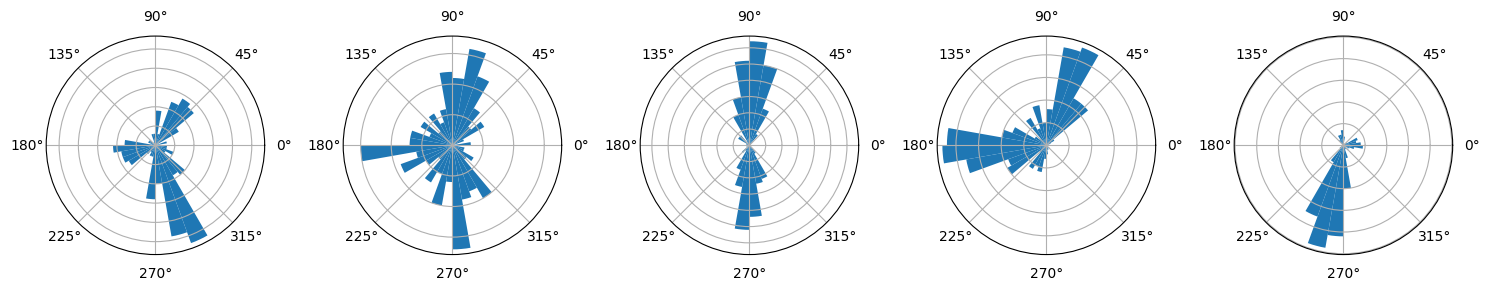

In [3]:
fig, axs = plt.subplots(1, 5, figsize=(15,3), subplot_kw=dict(projection="polar"))

for i, ax in enumerate(axs):
    ax.hist(np.deg2rad(SL.dihedrals[:,i]), bins = np.linspace(-np.pi, np.pi, 37))
    ax.set_yticklabels([])
plt.tight_layout()
plt.show()


In [4]:
SL.to_rotlib('CYR', 'Cstom MTSL (R1) rotamer library', "An MTSL/R1 rotamer library made with well tempered metadynamics") 

In [5]:
prot = xl.fetch('1ubq')

SL = xl.SpinLabel('CYR', 28, prot)
xl.save(prot, SL)
